## Schematic Figures

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
ts_path = '/home/despoB/adameich/Experiments/despolarity_collab/dynamic_FC/data/derivatives/preproc_32p_.01-.1/sub-201/ses-001/func/sub-201_ses-001_task-rest_run-001_bold_space-T1w_Schaefer400_readable.csv'

In [3]:
ts_df = pd.read_csv(ts_path, header=None)

In [4]:
ts_df.shape

(180, 400)

In [5]:
roi_idx = np.load('/home/despoB/adameich/Experiments/despolarity_collab/dynamic_FC/data/analyses/commonROIs_list_thresh-0.25_Schaefer400node.npy')

In [6]:
ts_df_clean = ts_df[roi_idx]

In [40]:
static_corrmat = np.loadtxt('/home/despoB/adameich/Experiments/despolarity_collab/dynamic_FC/data/derivatives/preproc_32p_.01-.1/sub-201/ses-001/func/DCC_corrmats_r-001/sub-201_ses-001_task-rest_run-001_bold_space-T1w_Schaefer400_DCC_TR-001_HD.txt')

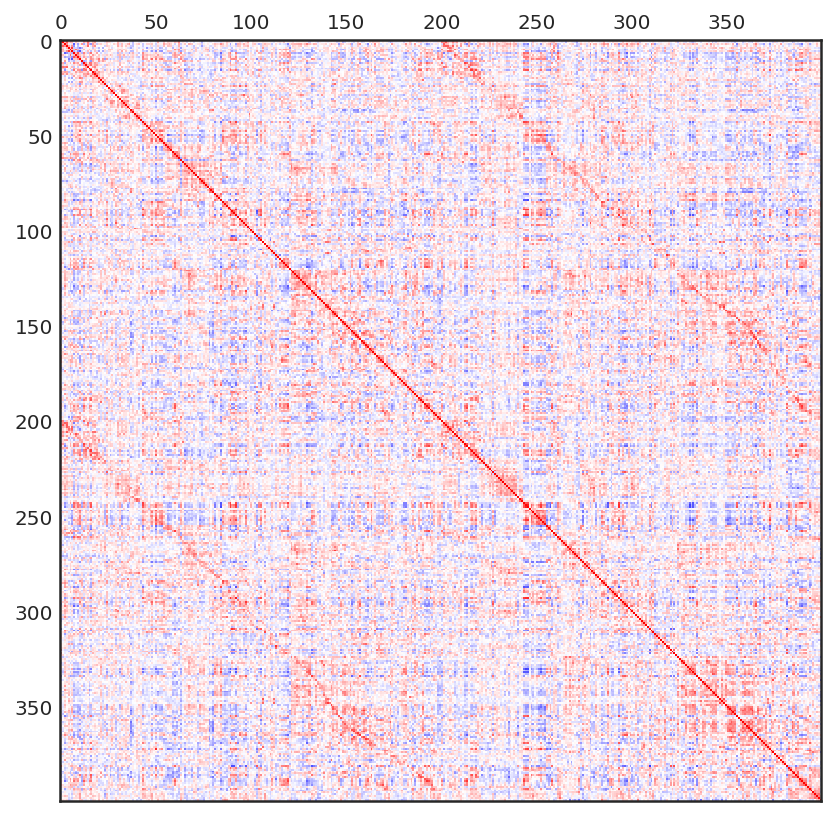

In [136]:
fig, ax = plt.subplots(figsize=(7,7))
ax.matshow(static_corrmat, cmap='bwr', vmin=-1, vmax=1)

## Plot time series from many ROI's ("whole brain")

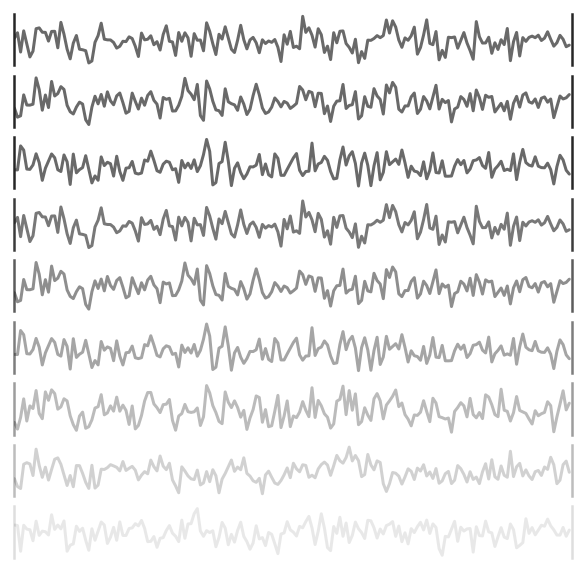

In [463]:
#sns.set_style("whitegrid")
sns.set_style("white")

num_rois = 9 # must be evenly divisible by 3 and 4

f, axarr = plt.subplots(num_rois, sharex=True, figsize=(5,5))

for group, axid in enumerate(axarr[0:int((num_rois / 3)*1)]):
    axid.plot(ts_df.iloc[:, group], c='dimgrey')
    axid.spines['top'].set_visible(False)
    axid.spines['bottom'].set_visible(False)
    axid.tick_params(left=False)
    axid.tick_params(labelleft=False)
    axid.tick_params(labelbottom=False)
    
for group, axid in enumerate(axarr[int((num_rois / 3)*1):]):
    alpha = (90 - group*15)/100
    axid.plot(ts_df.iloc[:, group], alpha=alpha, c='dimgrey')
    axid.spines['top'].set_visible(False)
    axid.spines['bottom'].set_visible(False)
    axid.tick_params(left=False)
    axid.tick_params(labelleft=False)
    axid.tick_params(labelbottom=False)
    axid.spines['left'].set_alpha(alpha)
    axid.spines['right'].set_alpha(alpha)
    
plt.xlim(0,180)
f.savefig('../figs/timeseries.eps', dpi=300)

## Plot bivariate time series (sliding window)

In [319]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [8]:
import matplotlib.transforms as mtransforms

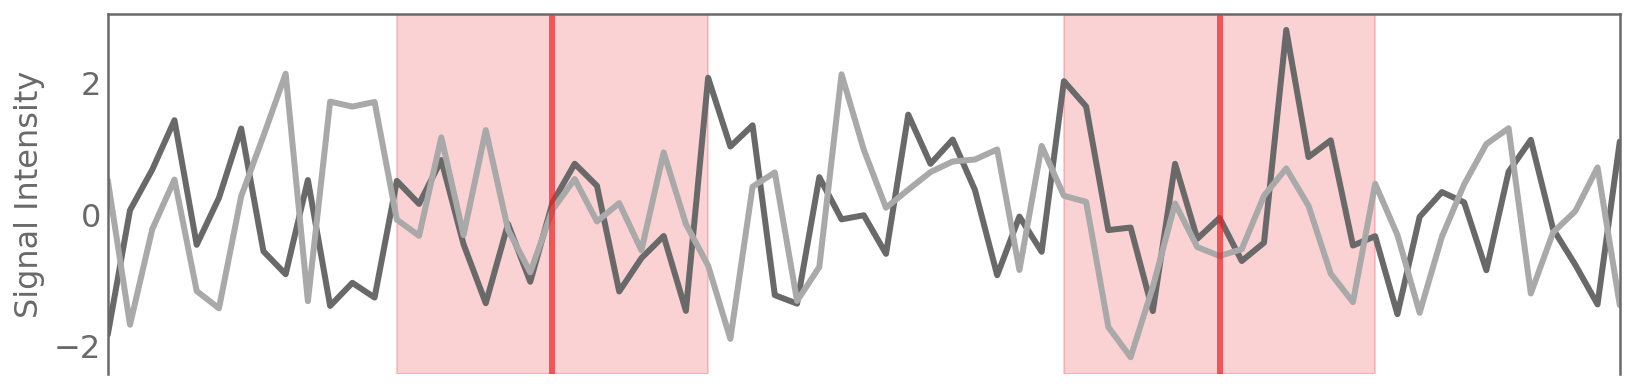

In [509]:
#sns.set_style("whitegrid")
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10.5,2.5))

ax.plot(stats.zscore(ts_df.iloc[110:179, 50]), c='dimgrey', lw=3)
ax.plot(stats.zscore(ts_df.iloc[110:179, 300]), c='darkgrey', lw=3)
#ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.tick_params(left=False)
#ax.tick_params(labelleft=False)
ax.tick_params(labelbottom=False, labelsize=16, colors='dimgrey')

# Draw the first sliding window
#ax.axvline(13, alpha=0.7, lw=3, color='#fb8072', linestyle='--')
ax.axvline(20, alpha=0.7, lw=3, color='#ed2024')
ax.axvspan(13,27, alpha=0.2, color='#ed2024')
#ax.axvline(27, alpha=0.7, lw=3, color='#fb8072', linestyle='--')

# Draw the second sliding window
ax.axvline(50, alpha=0.7, lw=3, color='#ed2024')
ax.axvspan(43,57, alpha=0.2, color='#ed2024')

#ax.axvline(57, alpha=0.7, lw=3, color='#fb8072', linestyle='--')
plt.ylabel("Signal Intensity", fontsize=16, color='dimgrey')

ax.spines['top'].set_color('dimgrey')
ax.spines['left'].set_color('dimgrey')
ax.spines['right'].set_color('dimgrey')

plt.xlim(0,68)
plt.tight_layout()
set_size(10.5,2.5)
fig.savefig('../figs/sliding_window.eps', dpi=300)
fig.savefig('../figs/sliding_window.pdf', dpi=300)
fig.savefig('../figs/sliding_window.svg', dpi=300)

## Plot DCC estimates

In [10]:
dcc_fpt = '/home/despoB/adameich/Experiments/despolarity_collab/dynamic_FC/data/derivatives/preproc_32p_.01-.1/sub-201/ses-001/func/DCC_corrmats_r-001/sub-201_ses-001_task-rest_run-001_bold_space-T1w_Schaefer400_DCC_TR-{:03d}_HD.txt'

In [274]:
dcc_ts = []
for vol in range(1,180):
    vol_dcc = np.genfromtxt(dcc_fpt.format(vol))[50,300]
    dcc_ts.append(vol_dcc)

In [344]:
from matplotlib.ticker import FormatStrFormatter

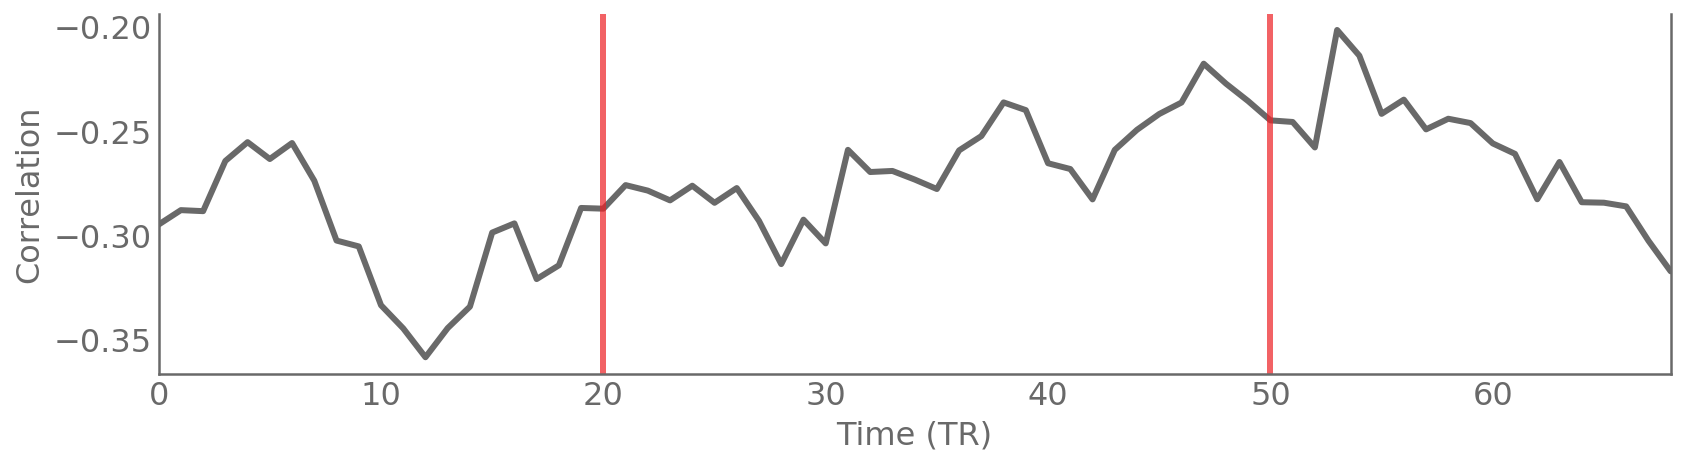

In [502]:
#sns.set_style("whitegrid")
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10.5,2.5))

ax.plot(dcc_ts[110:179], c='dimgrey', lw=3)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=16, colors='dimgrey')
#ax.tick_params(labelleft=False)
#ax.tick_params(labelbottom=False)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['left'].set_color('dimgrey')
ax.spines['right'].set_color('dimgrey')

ax.axvline(20, alpha=0.7, lw=3, color='#ed2024')
ax.axvline(50, alpha=0.7, lw=3, color='#ed2024')

plt.ylabel("Correlation", fontsize=16, color='dimgrey')
plt.xlabel("Time (TR)", fontsize=16, color='dimgrey')
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.xlim(0,68)
#plt.ylim(-0.4, -0.2)
plt.tight_layout()
set_size(10.5,2.5)
fig.savefig('../figs/single_tvs.eps', dpi=300)

## Plot example HMM states (from Ioannis)

In [355]:
from scipy.io import loadmat

In [420]:
state1 = loadmat('../data/state1.mat')
state2 = loadmat('../data/state2.mat')
state3 = loadmat('../data/state3.mat')
np.fill_diagonal(state1['state1'], 0)
np.fill_diagonal(state2['state2'], 0)
np.fill_diagonal(state3['state3'], 0)

In [466]:
state1['state1'].shape

(132, 132)

In [386]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [403]:
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.5)
    return fig.colorbar(mappable, cax=cax)

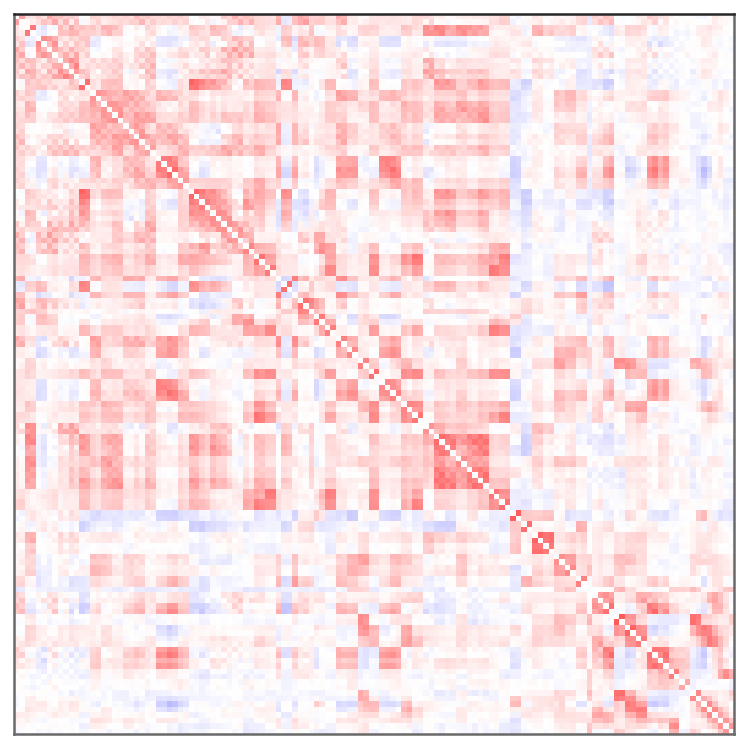

In [480]:
fig, ax = plt.subplots(figsize=(5,5))
im = ax.matshow(state1['state1'], cmap='bwr', vmin=-1, vmax=1)

ax.tick_params(labelsize=16, colors='dimgrey')
ax.tick_params(labelleft=False)
ax.tick_params(labeltop=False)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['left'].set_color('dimgrey')
ax.spines['right'].set_color('dimgrey')
set_size(5,5)
fig.savefig('../figs/state1.eps', dpi=300)

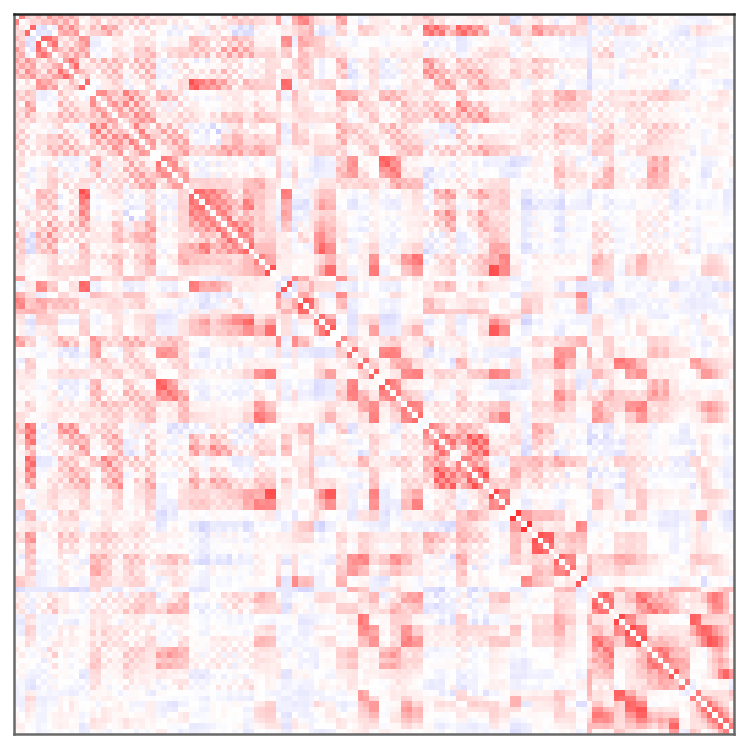

In [481]:
fig, ax = plt.subplots(figsize=(5,5))
im = ax.matshow(state2['state2'], cmap='bwr', vmin=-1, vmax=1)

ax.tick_params(labelsize=16, colors='dimgrey')
ax.tick_params(labelleft=False)
ax.tick_params(labeltop=False)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['left'].set_color('dimgrey')
ax.spines['right'].set_color('dimgrey')
set_size(5,5)
fig.savefig('../figs/state2.eps', dpi=300)

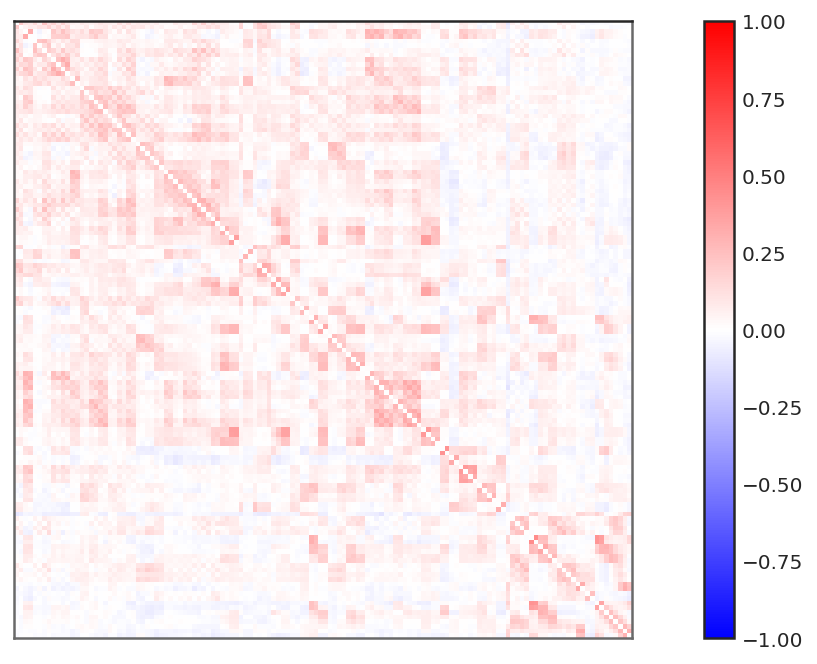

In [482]:
fig, ax = plt.subplots(figsize=(5,5))
im = ax.matshow(state3['state3'], cmap='bwr', vmin=-1, vmax=1)

ax.tick_params(labelsize=16, colors='dimgrey')
ax.tick_params(labelleft=False)
ax.tick_params(labeltop=False)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['left'].set_color('dimgrey')
ax.spines['right'].set_color('dimgrey')
colorbar(im)
set_size(5,5)
fig.savefig('../figs/state3.eps', dpi=300)

## Create example meta-states (whole-brain TVC volumes) by combining HMM states.

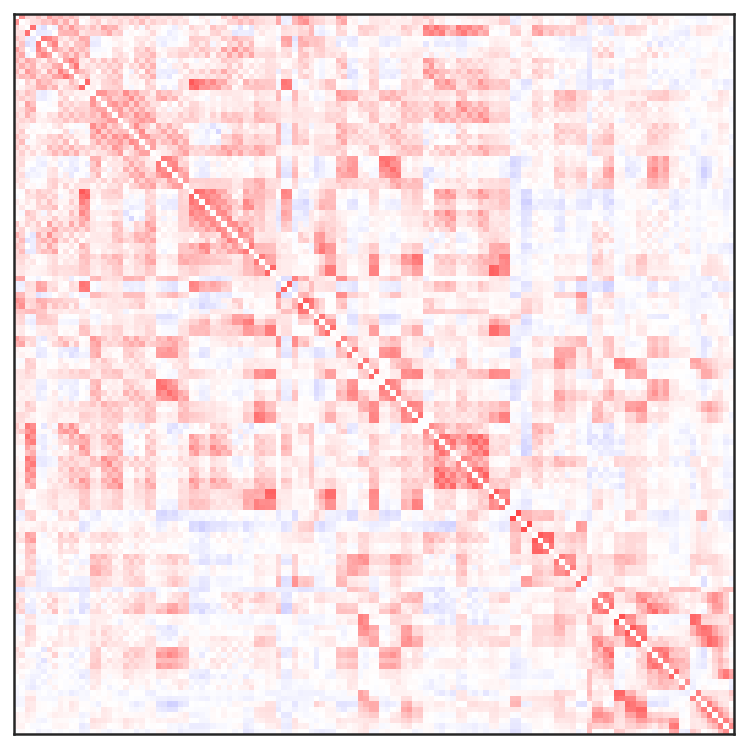

In [516]:
fig, ax = plt.subplots(figsize=(5,5))

ax.matshow((state1['state1']*0.5) + (state2['state2']*0.5), cmap='bwr', vmin=-1, vmax=1)

ax.tick_params(labelleft=False)
ax.tick_params(labeltop=False)

set_size(5,5)
fig.savefig('../figs/vol1_2.eps', dpi=300)


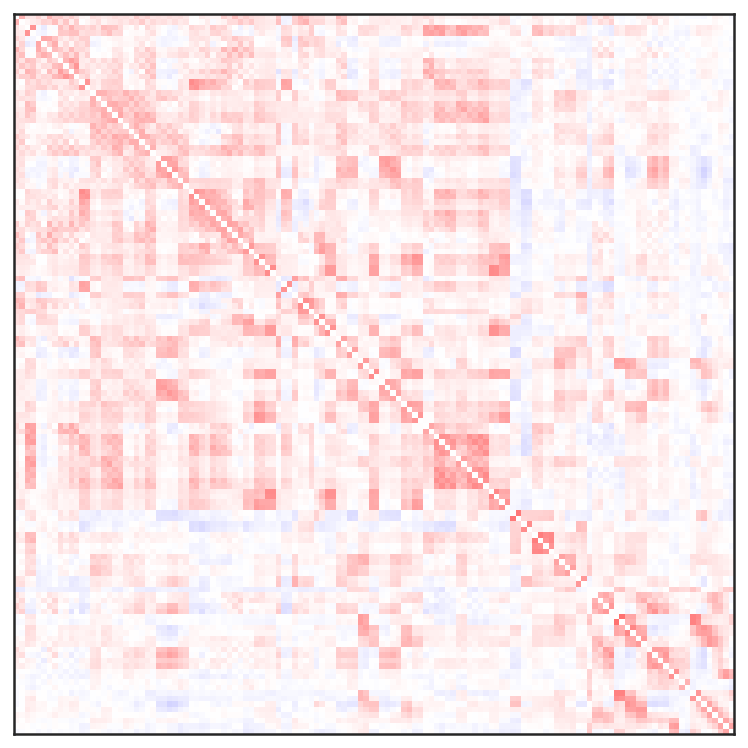

In [517]:
fig, ax = plt.subplots(figsize=(5,5))

ax.matshow((state1['state1']*0.5) + (state3['state3']*0.5), cmap='bwr', vmin=-1, vmax=1)

ax.tick_params(labelleft=False)
ax.tick_params(labeltop=False)

set_size(5,5)
fig.savefig('../figs/vol1_3.eps', dpi=300)


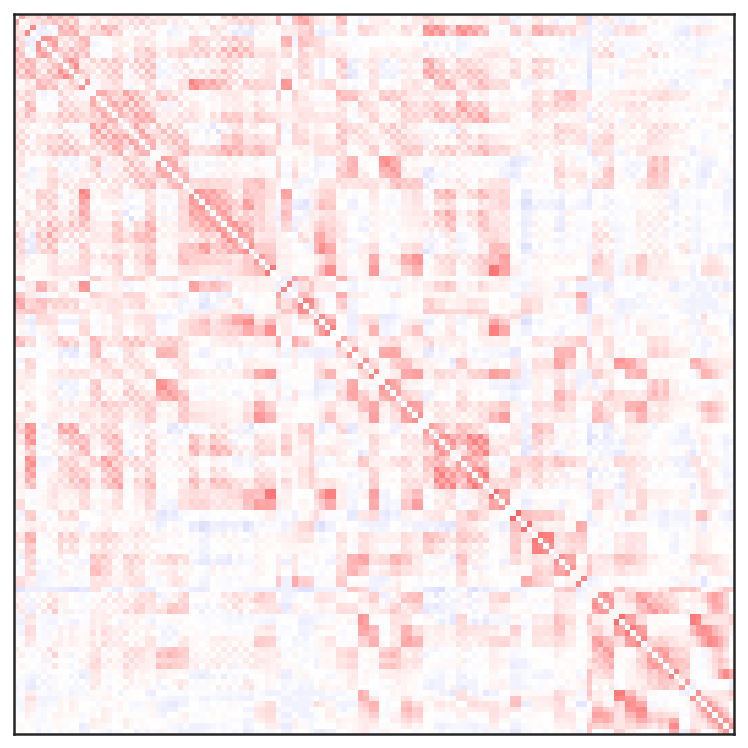

In [518]:
fig, ax = plt.subplots(figsize=(5,5))

ax.matshow((state2['state2']*0.5) + (state3['state3']*0.5), cmap='bwr', vmin=-1, vmax=1)

ax.tick_params(labelleft=False)
ax.tick_params(labeltop=False)

set_size(5,5)
fig.savefig('../figs/vol2_3.eps', dpi=300)
